## An interactive version of Kalick Hamilton model

Import model, define parameters and run to see results, while below there is batch run results with multiple scenarios.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from kalick_hamilton_grow.model import KalickHamilton

In [2]:
model = KalickHamilton(num_nodes=500, preference='matching')

In [3]:
model.schedule.get_agent_count()

500

In [4]:
while model.running and model.schedule.steps < 1000:
    model.step()
print(model.schedule.steps) # Show how many steps have actually run

51


In [5]:
model_out = model.datacollector.get_model_vars_dataframe()
agents_out = model.datacollector.get_agent_vars_dataframe()

In [6]:
# model level (macro) outputs
model_out

,number_single,number_female,number_union,mean_attractiveness,corr_results
0,500,250,0,None,NaN
1,368,250,132,0.488,0.109125
2,298,250,202,0.496,0.340369
3,268,250,232,0.5,0.371991
4,230,250,270,0.499,0.361605
5,200,250,300,0.499,0.383619
6,180,250,320,0.5,0.397468
7,164,250,336,0.5,0.407667
8,148,250,352,0.5,0.422187
9,128,250,372,0.501,0.422237


In [7]:
to_plot = model_out.dropna()[['mean_attractiveness', 'corr_results']]
to_plot.mean_attractiveness = to_plot.mean_attractiveness.astype(float)

<AxesSubplot:>

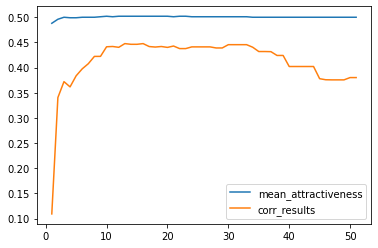

In [8]:
to_plot.plot()

In [9]:
agents_out.shape

(26000, 3)

In [10]:
# looking at one agent behavior
agents_out[agents_out.index.get_level_values('AgentID').isin([0])].head(n=60)

,,attractiveness,sex,relationship
Step,AgentID,,,
0,0,6.537524,FEMALE,SINGLE
1,0,6.537524,FEMALE,SINGLE
2,0,6.537524,FEMALE,SINGLE
3,0,6.537524,FEMALE,SINGLE
4,0,6.537524,FEMALE,SINGLE
5,0,6.537524,FEMALE,SINGLE
6,0,6.537524,FEMALE,SINGLE
7,0,6.537524,FEMALE,SINGLE
8,0,6.537524,FEMALE,SINGLE


In [11]:
# looking at final step of all agents
agents_out[agents_out.index.get_level_values('Step').isin([model.schedule.steps])].head(n=60)

attractiveness     sex relationship
Step AgentID                                     
51   0              6.537524  FEMALE        UNION
     1              5.702871  FEMALE        UNION
     2              3.280463    MALE        UNION
     3              4.265984  FEMALE        UNION
     4              4.672783  FEMALE        UNION
     5              6.655043  FEMALE        UNION
     6              6.685668  FEMALE        UNION
     7              3.344518  FEMALE        UNION
     8              5.336699    MALE        UNION
     9              5.445304    MALE        UNION
     10             2.652901  FEMALE        UNION
     11             4.318992    MALE        UNION
     12             3.652479  FEMALE        UNION
     13             6.766521    MALE        UNION
     14             4.877288    MALE        UNION
     15             4.805819    MALE        UNION
     16             6.056023  FEMALE        UNION
     17             7.087560    MALE        UNION
     18             6.627146    MALE        UNION
     19             7.136633  FEMALE        UNION
     20             4.744702    MALE        UNION
     21             5.275481  FEMALE        UNION
     22             4.885296    MALE        UNION
     23             5.025852  FEMALE        UNION
     24             4.949406  FEMALE        UNION
     25             4.787606  FEMALE        UNION
     26             5.139402  FEMALE        UNION
     27             6.373953    MALE        UNION
     28             5.817261  FEMALE        UNION
     29             3.014442    MALE        UNION
     30             5.293704    MALE        UNION
     31             3.805225    MALE        UNION
     32             4.789094    MALE        UNION
     33             6.311511    MALE       SINGLE
     34             3.848775    MALE        UNION
     35             2.854493    MALE        UNION
     36             4.827370  FEMALE        UNION
     37             5.135176    MALE        UNION
     38             3.919403    MALE        UNION
     39             4.779250  FEMALE        UNION
     40             5.791116    MALE        UNION
     41             6.155930  FEMALE        UNION
     42             4.998886    MALE        UNION
     43             4.237605    MALE        UNION
     44             6.027962  FEMALE        UNION
     45             6.170061    MALE       SINGLE
     46             4.983887  FEMALE        UNION
     47             4.133995  FEMALE        UNION
     48             6.476129  FEMALE        UNION
     49             4.684258  FEMALE        UNION
     50             5.196595    MALE        UNION
     51             4.149613  FEMALE        UNION
     52             6.202601  FEMALE        UNION
     53             5.028387    MALE        UNION
     54             3.638307    MALE        UNION
     55             4.486069  FEMALE        UNION
     56             4.173365  FEMALE        UNION
     57             4.234088  FEMALE       SINGLE
     58             4.048918  FEMALE        UNION
     59             5.943918  FEMALE        UNION

# Read in batch run resutls with parameter sweeps

In [12]:
br_model = pd.read_csv('./data/KHG_model_data.csv')
br_agents = pd.read_csv('./data/KHG_agents_data.csv')

In [13]:
# Different parameters used:
# br_params = {num_nodes": [100],
#              "preference": ["attractiveness", "matching", "mixed"],
#              "mean_male": [5, 10],
#              "sd_male": [1],
#              "mean_female": [5, 10],
#              "sd_female": [1]
#              }

In [14]:
br_model.head(n=10)

,Unnamed: 0,number_single,number_female,number_union,mean_attractiveness,corr_results,Model Params,Run
0,0,100,50,0,NaN,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
1,1,100,50,0,NaN,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
2,2,100,50,0,NaN,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
3,3,100,50,0,NaN,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
4,4,98,50,2,0.610,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
5,5,98,50,2,0.610,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
6,6,98,50,2,0.610,NaN,"(100, 'attractiveness', 5, 1, 5, 1)",1
7,7,96,50,4,0.637,-1.0,"(100, 'attractiveness', 5, 1, 5, 1)",1
8,8,96,50,4,0.637,-1.0,"(100, 'attractiveness', 5, 1, 5, 1)",1
9,9,96,50,4,0.637,-1.0,"(100, 'attractiveness', 5, 1, 5, 1)",1


### A plot showing relation between mean attractiveness and union correlations in different parameter combinations

<ipython-input-15-abe6ea22c07d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  br_model.groupby(['Model Params', 'Run'])['mean_attractiveness', 'corr_results'].plot()
/Users/ali/anaconda3/envs/ali/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


Model Params                           Run
(100, 'attractiveness', 10, 1, 10, 1)  10     AxesSubplot(0.125,0.125;0.775x0.755)
                                       11     AxesSubplot(0.125,0.125;0.775x0.755)
                                       12     AxesSubplot(0.125,0.125;0.775x0.755)
(100, 'attractiveness', 10, 1, 5, 1)   7      AxesSubplot(0.125,0.125;0.775x0.755)
                                       8      AxesSubplot(0.125,0.125;0.775x0.755)
                                       9      AxesSubplot(0.125,0.125;0.775x0.755)
(100, 'attractiveness', 5, 1, 10, 1)   4      AxesSubplot(0.125,0.125;0.775x0.755)
                                       5      AxesSubplot(0.125,0.125;0.775x0.755)
                                       6      AxesSubplot(0.125,0.125;0.775x0.755)
(100, 'attractiveness', 5, 1, 5, 1)    1      AxesSubplot(0.125,0.125;0.775x0.755)
                                       2      AxesSubplot(0.125,0.125;0.775x0.755)
                                       3    

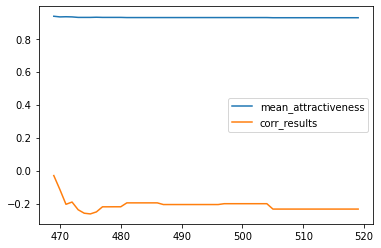

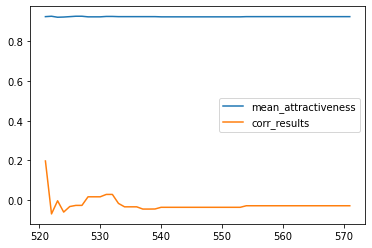

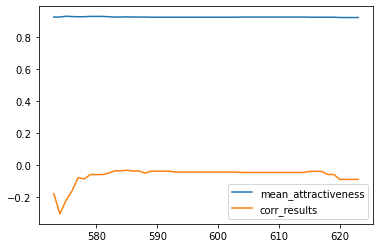

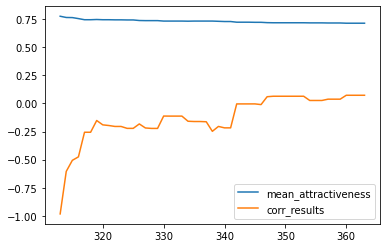

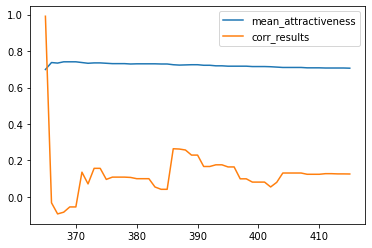

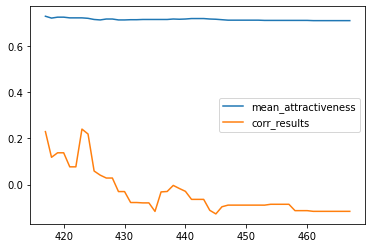

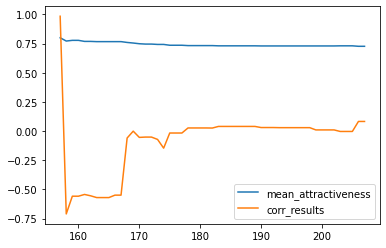

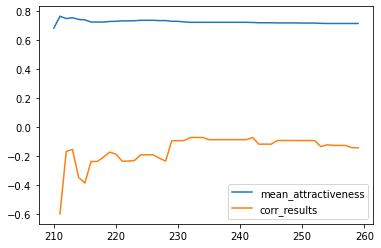

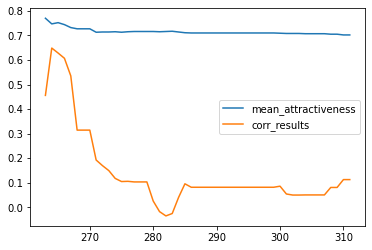

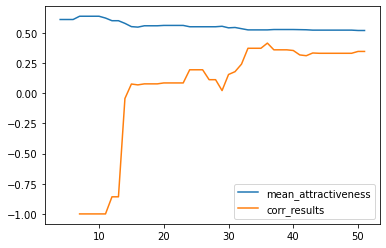

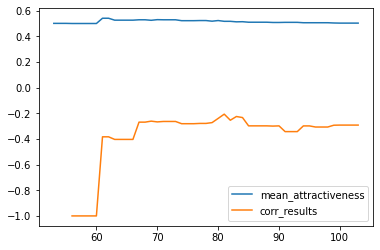

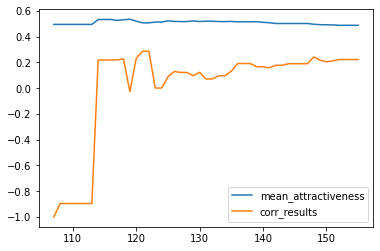

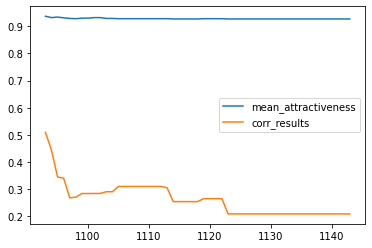

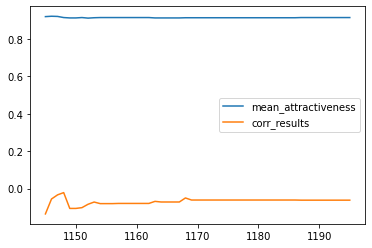

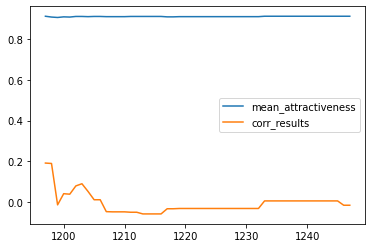

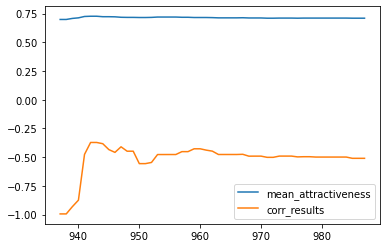

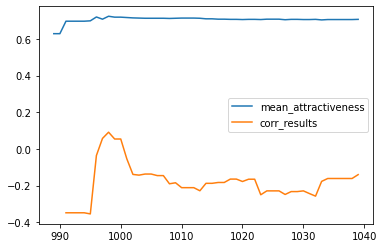

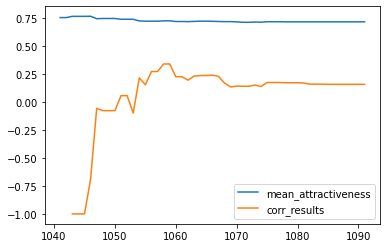

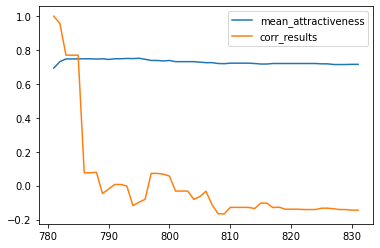

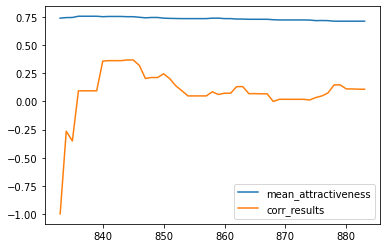

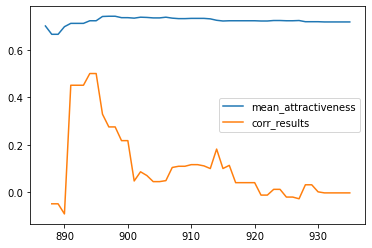

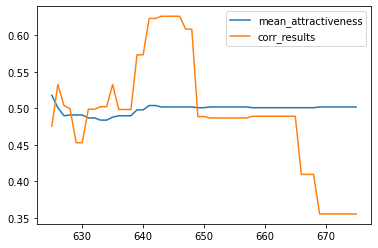

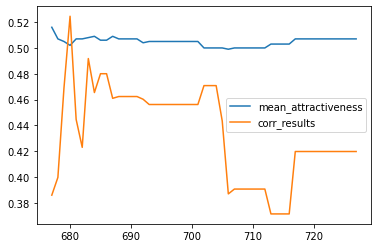

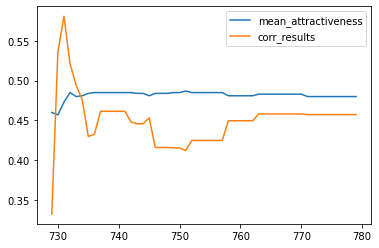

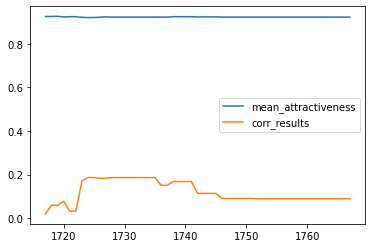

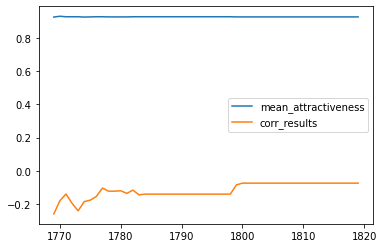

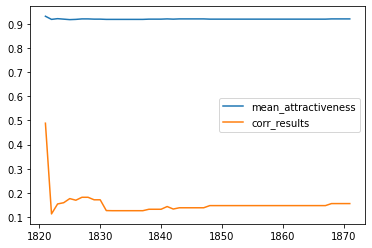

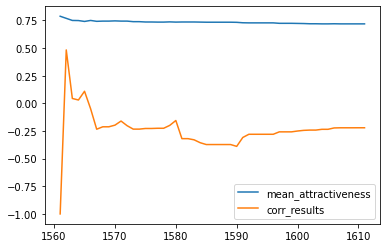

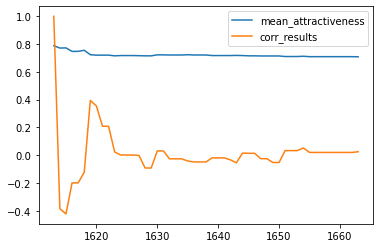

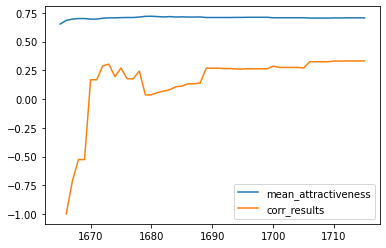

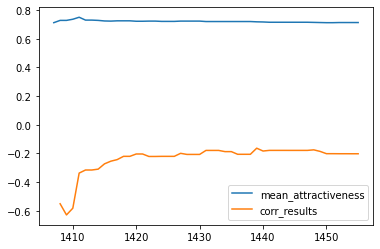

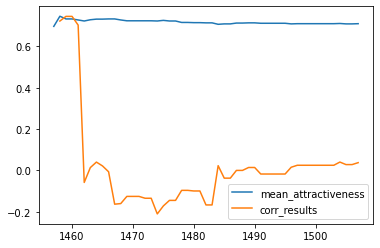

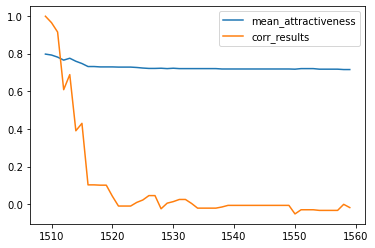

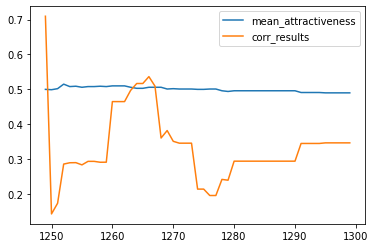

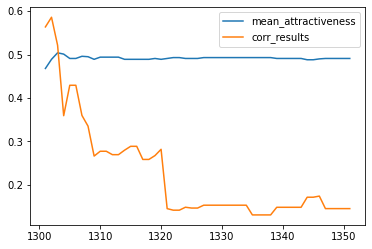

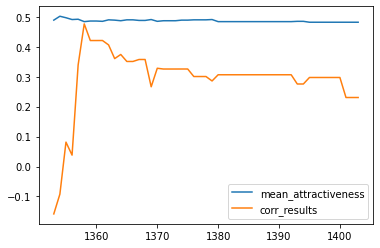

In [15]:
br_model.groupby(['Model Params', 'Run'])['mean_attractiveness', 'corr_results'].plot()

### Results for each agent in each run with parameter combinations

In [16]:
br_agents.head(n=10)

,Unnamed: 0,name,sex,attractiveness,relationship,Model Params,Run
0,0,0,FEMALE,5.877784,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
1,1,1,FEMALE,3.550600,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
2,2,2,MALE,5.291758,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
3,3,3,MALE,6.492634,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
4,4,4,MALE,5.783796,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
5,5,5,FEMALE,5.040094,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
6,6,6,MALE,4.787298,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
7,7,7,FEMALE,5.451668,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
8,8,8,FEMALE,8.024214,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
9,9,9,FEMALE,3.460094,SINGLE,"(100, 'attractiveness', 5, 1, 5, 1)",1
